In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import random

import scipy
from scipy import stats
from scipy.stats import binom,poisson,norm,t

import pylab
from pylab import legend, plot, show ,title, xlabel, ylabel

In [81]:
df=pd.read_excel('MyChurnData.xlsx')  #churning means leaving a company
df.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,6,5
0,0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,NaN,NaN
1,1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,NaN,NaN
2,2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,NaN,NaN
3,3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,NaN,NaN
4,4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,NaN,NaN


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   RowNumber        10000 non-null  int64  
 2   CustomerId       10000 non-null  int64  
 3   Surname          10000 non-null  object 
 4   CreditScore      10000 non-null  int64  
 5   Geography        10000 non-null  object 
 6   Gender           9783 non-null   object 
 7   Age              9822 non-null   float64
 8   Tenure           10000 non-null  int64  
 9   Balance          10000 non-null  float64
 10  NumOfProducts    10000 non-null  int64  
 11  HasCrCard        10000 non-null  int64  
 12  IsActiveMember   10000 non-null  int64  
 13  EstimatedSalary  10000 non-null  float64
 14  Exited           10000 non-null  int64  
 15  6                0 non-null      float64
 16  5                0 non-null      float64
dtypes: float64(5)

In [83]:
pd.set_option('display.max_columns',None)  #this command displays all columns from first to last
#It does not skip the huge number of volumns which are in between.

In [84]:
df.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,6,5
0,0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,NaN,NaN
1,1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,NaN,NaN
2,2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,NaN,NaN
3,3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,NaN,NaN
4,4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,NaN,NaN


In [85]:
df=df.drop(['Unnamed: 0','RowNumber','CustomerId','Surname',6,5],axis=1)  #for columns whichever are not needed are removed.

In [86]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [87]:
df['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [88]:
df.shape

(10000, 11)

In [89]:
df.Gender.value_counts()

Gender
Male      5348
Female    4435
Name: count, dtype: int64

In [90]:
5348/10000  #approx 0.5

0.5348

In [91]:
10000-9783 #missing values of gender column

217

In [92]:
0.55*217 #we will consider these many as males - approx 119

119.35000000000001

In [95]:
nl_gen=np.where(df['Gender'].isnull())[0]   #where there are null values in the gender column
nl_gen

array([ 204,  294,  310,  342,  357,  359,  363,  388,  408,  411,  541,
        560,  627,  698,  707,  755,  783,  895,  966, 1006, 1013, 1034,
       1061, 1078, 1084, 1132, 1188, 1225, 1242, 1246, 1288, 1398, 1468,
       1550, 1646, 1672, 1844, 1885, 1926, 2001, 2076, 2098, 2108, 2111,
       2156, 2191, 2212, 2225, 2254, 2479, 2481, 2557, 2583, 2596, 2645,
       2717, 2724, 2727, 2767, 2778, 2813, 2820, 2847, 2857, 2915, 2935,
       2973, 3071, 3114, 3172, 3210, 3235, 3292, 3313, 3355, 3358, 3369,
       3417, 3481, 3516, 3518, 3564, 3595, 3752, 3759, 3761, 3920, 3959,
       4000, 4135, 4153, 4272, 4329, 4341, 4369, 4399, 4461, 4539, 4544,
       4611, 4670, 4681, 4734, 4740, 4809, 4986, 5020, 5042, 5052, 5104,
       5248, 5268, 5294, 5310, 5363, 5395, 5423, 5491, 5507, 5585, 5646,
       5763, 5775, 5874, 5882, 5884, 5911, 5914, 6004, 6158, 6176, 6182,
       6247, 6248, 6317, 6393, 6412, 6489, 6502, 6555, 6600, 6634, 6640,
       6650, 6682, 6754, 6782, 6794, 6861, 6880, 68

In [97]:
df.at[nl_gen[:119],'Gender']='Male'
df.at[nl_gen[119:],'Gender']='Female'



InvalidIndexError: You can only assign a scalar value not a <class 'str'>

In [96]:
df.iloc[nl_gen]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
204,512,Spain,NaN,33.0,3,176666.62,1,1,0,94670.77,0
294,681,France,NaN,38.0,3,0.00,2,1,1,112491.96,0
310,652,France,NaN,80.0,4,0.00,2,1,1,188603.07,0
342,545,Spain,NaN,47.0,5,0.00,2,1,1,38970.14,0
357,522,Spain,NaN,34.0,9,126436.29,1,1,0,174248.52,1
...,...,...,...,...,...,...,...,...,...,...,...
9728,616,Germany,NaN,43.0,7,95984.21,1,0,1,115262.54,1
9798,600,Germany,NaN,30.0,2,119755.00,1,1,1,21852.91,0
9914,496,France,NaN,34.0,1,102723.35,2,1,0,180844.81,0
9943,784,Spain,NaN,23.0,2,0.00,1,1,1,6847.73,0


In [ ]:
df.loc[nl_gen[:119],'Gender']='Male'
df.loc[nl_gen[119:],'Gender']='Female'

array([1, 3, 2, 4])

In [49]:
df.iloc[nl_gen]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
204,512,Spain,Male,33.0,3,176666.62,1,1,0,94670.77,0
294,681,France,Male,38.0,3,0.00,2,1,1,112491.96,0
310,652,France,Male,80.0,4,0.00,2,1,1,188603.07,0
342,545,Spain,Male,47.0,5,0.00,2,1,1,38970.14,0
357,522,Spain,Male,34.0,9,126436.29,1,1,0,174248.52,1
...,...,...,...,...,...,...,...,...,...,...,...
9728,616,Germany,Female,43.0,7,95984.21,1,0,1,115262.54,1
9798,600,Germany,Female,30.0,2,119755.00,1,1,1,21852.91,0
9914,496,France,Female,34.0,1,102723.35,2,1,0,180844.81,0
9943,784,Spain,Female,23.0,2,0.00,1,1,1,6847.73,0


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

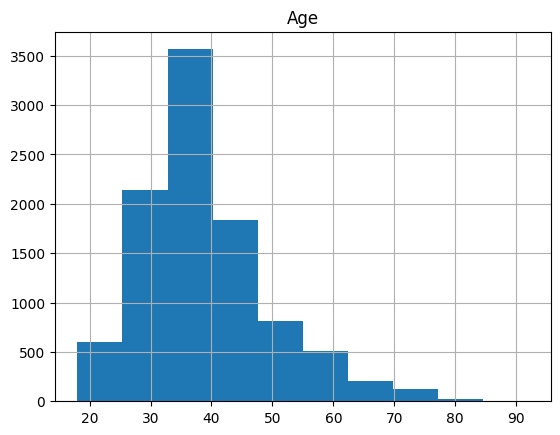

In [98]:
df.hist('Age')

In [ ]:
# plt.scatter(x=df['Age'],y=df['EstimatedSalary'])

In [106]:
df['Age']

0       42.0
1       41.0
2       42.0
3       39.0
4       43.0
        ... 
9995    39.0
9996    35.0
9997    36.0
9998    42.0
9999    28.0
Name: Age, Length: 10000, dtype: float64

<Axes: ylabel='Age'>

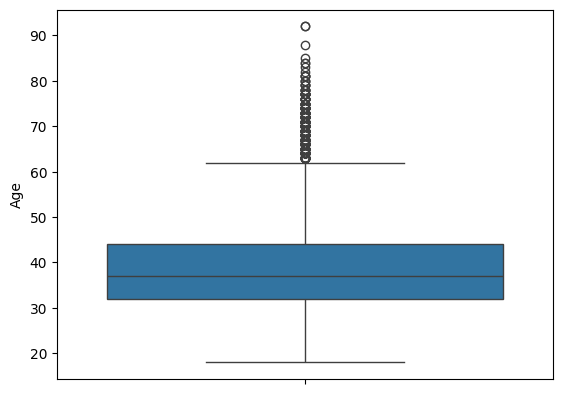

In [110]:
sns.boxplot(data=df,y='Age')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a313b6ffe0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a313ee9730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a313b77560>],
 'medians': [<matplotlib.lines.Line2D at 0x1a313ee8230>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a313eeb620>],
 'means': []}

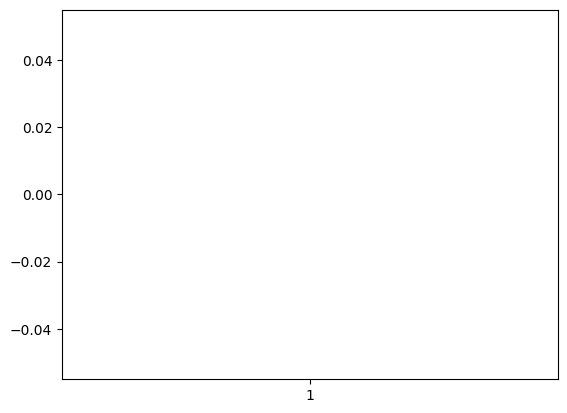

In [103]:
df.Age.median()

np.float64(37.0)

In [104]:
max(df.Age)

92.0


segrate exit and non exit based on age, geography, gender , etc

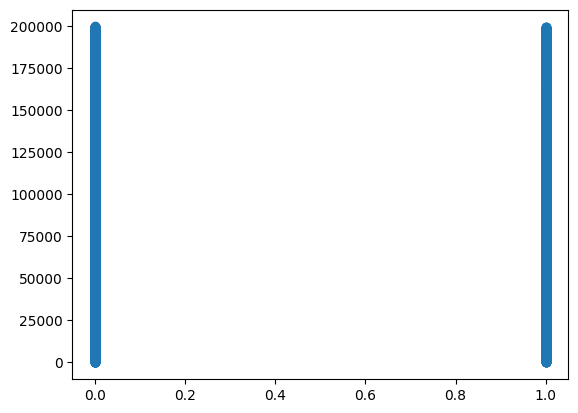

In [119]:
plt.scatter(y=df['EstimatedSalary'],x=df['Exited'])


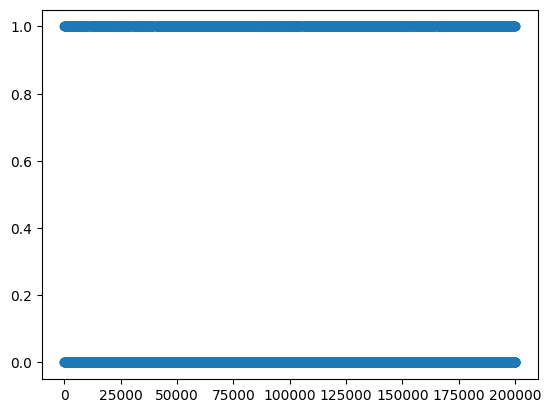

In [117]:
plt.scatter(x=df['EstimatedSalary'],y=df['Exited'])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

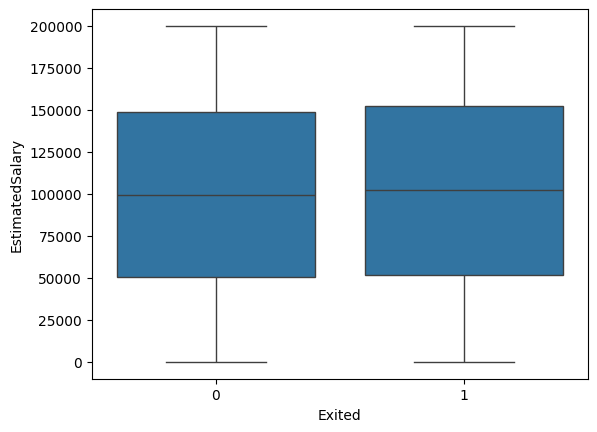

In [126]:
sns.boxplot(x=df['Exited'],y=df['EstimatedSalary'])

<Axes: xlabel='Exited', ylabel='Balance'>

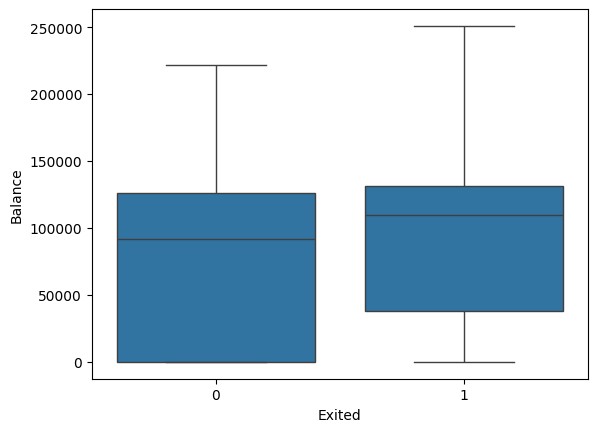

In [127]:

sns.boxplot(x=df['Exited'],y=df['Balance'])


<Axes: xlabel='EstimatedSalary', ylabel='Balance'>

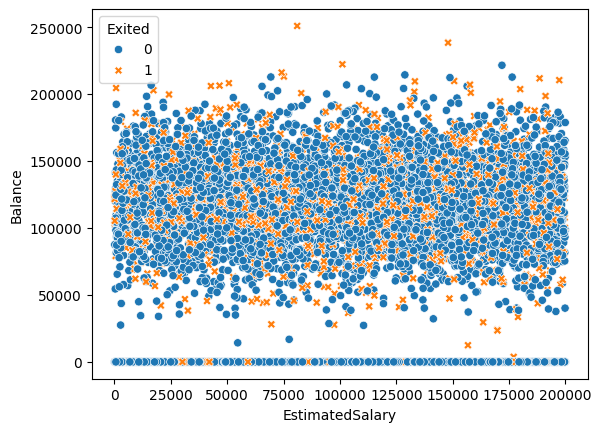

In [124]:
sns.scatterplot(x=df['EstimatedSalary'],y=df['Balance'],data=df,hue=df['Exited'],style=df['Exited'])

In [131]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [133]:
df['HasCrCard'].unique()

array([1, 0])


Univariate analysis-<br>
Bivariate

In [135]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [137]:
tbl=pd.crosstab(df.Geography,df.Exited)
tbl

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [138]:
tbl=pd.crosstab(df.Geography,df.Exited).reset_index()  #counts of 0 and 1 in different,unique geographies.
tbl

Exited,Geography,0,1
0,France,4204,810
1,Germany,1695,814
2,Spain,2064,413
